In [1]:
import numpy as np
from numpy import asarray
from matplotlib import image
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
# Convert image

def convert_image_to_array(filename):
    #load image
    image = Image.open(filename)
    # convert image to numpy array
    px_np = asarray(image)
    return px_np

def convert_array_to_image(np_array):
    img = Image.fromarray(np_array)
    return img

In [3]:
#init centroids by random k-point in datasets
def init_centroids(X,k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [4]:
#assign label's point to the nearest cluster centtoid
#return array:lables
def ass_labels(X, C): #C is centroids
    label = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        dist= np.linalg.norm((X[i] - C), axis=1) #distance 
        label[i]= np.argmin(dist)
    return label
 

In [5]:
#update centter's cluster
def update_centrs(X, label, k ):
    C = np.zeros((k,X.shape[1]))
    for i in range(k):
        #group all point of cluster-i
        Xi = X[label==i,:]
        #update new center of clus-i
        C[i,:]=np.mean(Xi, axis=0)
    return C

In [6]:
def k_meanAlgorthim(X, k, num_iter):
    C = init_centroids(X,k)
    Y = np.array(X.shape[0]) # array labels
    for i in range(num_iter):
        Y=ass_labels(X,C)
        C=update_centrs(X, Y, k)
    return C, Y
    


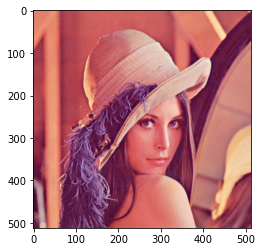

In [7]:
# Ảnh chưa giarmm màu
img = convert_image_to_array('Lenna_(test_image).png')
plt.imshow(img)


In [8]:
#reshape img -> img_1d ->(X)
#shape[0] * shape[1]: high*wid , shape[2]: num_chanels
img_1d = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
img_1d

array([[226, 137, 125],
       [226, 137, 125],
       [223, 137, 133],
       ...,
       [179,  70,  79],
       [181,  71,  81],
       [185,  74,  81]], dtype=uint8)

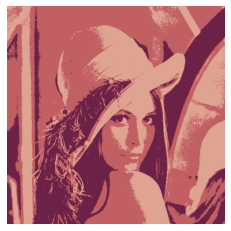

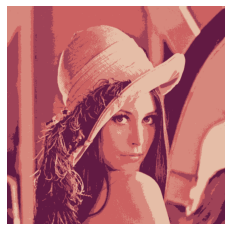

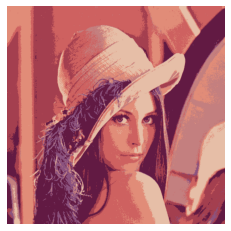

In [16]:
# iters = [20,30,40,...] 
iters = 20
for K in [3,5,7]:
    centroid, label = k_meanAlgorthim(img_1d, K, iters)
    new_img = np.zeros_like(img_1d)
    # replace each pixel by its center
    for k in range(K):
        new_img[label == k] = centroid[k]
    # reshape and display output image
    new_img =new_img.reshape((img.shape[0],img.shape[1],img.shape[2]))
    plt.imshow(new_img) #ảnh đã giảm màu
    plt.axis('off')
    plt.show()